# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(12,4)
sns.set_context("talk",font_scale=.9)

## Opening zip file in juputer notebook

In [2]:
import glob
folder = "Data/Data/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df=pd.concat([pd.read_csv(f) for f in crime_files])

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


## Setting date to datetime type

In [4]:
df['Date']=pd.to_datetime(df['Date'],format='%m/%d/%Y %I:%M:%S %p')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [5]:
df=df.sort_values('Date')
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
1541,3214584,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
1445,1927872,2001-01-01 00:00:00,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
1446,4768442,2001-01-01 00:00:00,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707
1447,2280620,2001-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782
1448,9755214,2001-01-01 00:00:00,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
238753,12938351,2022-12-31 23:47:00,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399
238754,12938340,2022-12-31 23:47:00,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399
238755,12938426,2022-12-31 23:50:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744
238756,12938337,2022-12-31 23:50:00,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,False,2431,24.0,49.0,42.009108,-87.666844


## Setting Date to index 

In [6]:
df=df.set_index('Date').copy()
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707
2001-01-01,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782
2001-01-01,9755214,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN


## Filtering out Theft and Narcotics to two seperate Dataframes

In [7]:
theft=df[df['Primary Type']=='THEFT']
theft

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:00:00,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01 00:00:00,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01 00:00:00,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782
2001-01-01 00:00:00,3164436,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1132,11.0,24.0,41.874375,-87.732531
2001-01-01 00:00:00,4160307,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,1021,10.0,24.0,41.862175,-87.711496
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:00:00,12942610,THEFT,OVER $500,APARTMENT,False,False,1512,15.0,29.0,NaN,NaN
2022-12-31 23:00:00,13026856,THEFT,OVER $500,STREET,False,False,1224,12.0,27.0,NaN,NaN
2022-12-31 23:30:00,12950713,THEFT,POCKET-PICKING,BAR OR TAVERN,False,False,1822,18.0,27.0,NaN,NaN


In [8]:
df['Primary Type'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

In [9]:
narcotics=df[df["Primary Type"]=='NARCOTICS']
narcotics

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:25:00,1327588,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,CTA TRAIN,True,False,132,1.0,NaN,41.868041,-87.627290
2001-01-01 00:45:00,1324718,NARCOTICS,POSS: CRACK,CHA APARTMENT,True,False,723,7.0,NaN,41.775229,-87.640605
2001-01-01 00:45:00,1327256,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,1332,12.0,NaN,41.882753,-87.676829
2001-01-01 01:12:00,1325471,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,True,False,2411,24.0,NaN,42.012293,-87.694610
2001-01-01 02:29:00,1324655,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,VEHICLE NON-COMMERCIAL,True,False,623,6.0,NaN,41.750884,-87.623141
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 15:37:00,12937989,NARCOTICS,SOLICIT NARCOTICS ON PUBLIC WAY,SIDEWALK,True,False,1122,11.0,28.0,41.880749,-87.723929
2022-12-31 16:20:00,12938016,NARCOTICS,POSSESS - HEROIN (WHITE),SIDEWALK,True,False,1112,11.0,27.0,41.901522,-87.720176
2022-12-31 17:03:00,12938026,NARCOTICS,POSSESS - CANNABIS MORE THAN 30 GRAMS,STREET,True,False,1522,15.0,29.0,41.880951,-87.764879


In [10]:
theft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1626992 entries, 2001-01-01 00:00:00 to 2022-12-31 23:35:00
Data columns (total 11 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1626992 non-null  int64  
 1   Primary Type          1626992 non-null  object 
 2   Description           1626992 non-null  object 
 3   Location Description  1626209 non-null  object 
 4   Arrest                1626992 non-null  bool   
 5   Domestic              1626992 non-null  bool   
 6   Beat                  1626992 non-null  int64  
 7   District              1626988 non-null  float64
 8   Ward                  1504194 non-null  float64
 9   Latitude              1605887 non-null  float64
 10  Longitude             1605887 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 127.2+ MB


In [11]:
narcotics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746155 entries, 2001-01-01 00:25:00 to 2022-12-31 21:45:00
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    746155 non-null  int64  
 1   Primary Type          746155 non-null  object 
 2   Description           746155 non-null  object 
 3   Location Description  746154 non-null  object 
 4   Arrest                746155 non-null  bool   
 5   Domestic              746155 non-null  bool   
 6   Beat                  746155 non-null  int64  
 7   District              746154 non-null  float64
 8   Ward                  678832 non-null  float64
 9   Latitude              733594 non-null  float64
 10  Longitude             733594 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 58.4+ MB


## Resampling to Months and using size() ans the agg

In [12]:
rtheft=theft.resample('M').size()
rtheft

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
              ... 
2022-08-31    5244
2022-09-30    5117
2022-10-31    5242
2022-11-30    4717
2022-12-31    4413
Freq: M, Length: 264, dtype: int64

In [13]:
rnarcotics=narcotics.resample('M').size()
rnarcotics

Date
2001-01-31    4714
2001-02-28    4369
2001-03-31    4862
2001-04-30    4044
2001-05-31    4038
              ... 
2022-08-31     420
2022-09-30     379
2022-10-31     358
2022-11-30     339
2022-12-31     325
Freq: M, Length: 264, dtype: int64

## Checking for Nulls

In [14]:
rtheft.isna().sum()

0

In [15]:
rnarcotics.isna().sum()

0

## Graping the data

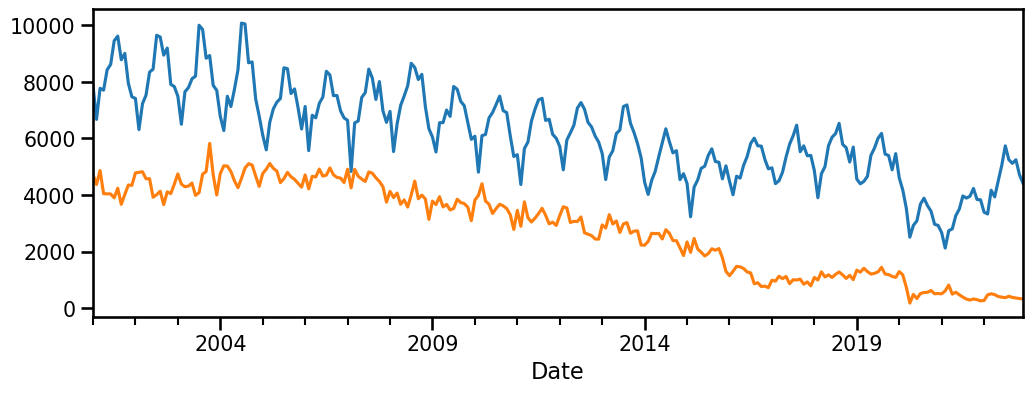

In [16]:
rtheft.plot()
rnarcotics.plot();

# Decomposing the data

In [17]:
import statsmodels.tsa.api as tsa

## Seasonal

In [18]:
dtheft=tsa.seasonal_decompose(rtheft)
dtheft

In [19]:
dnarcotics=tsa.seasonal_decompose(rnarcotics)
dnarcotics

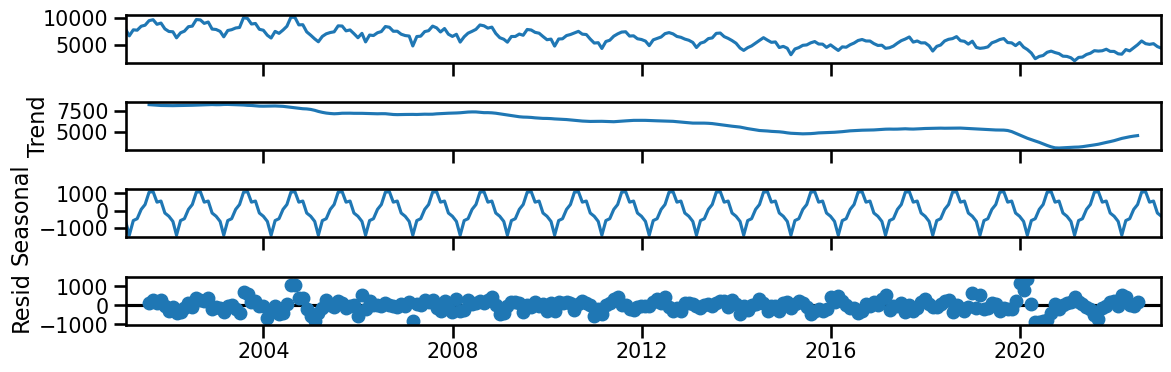

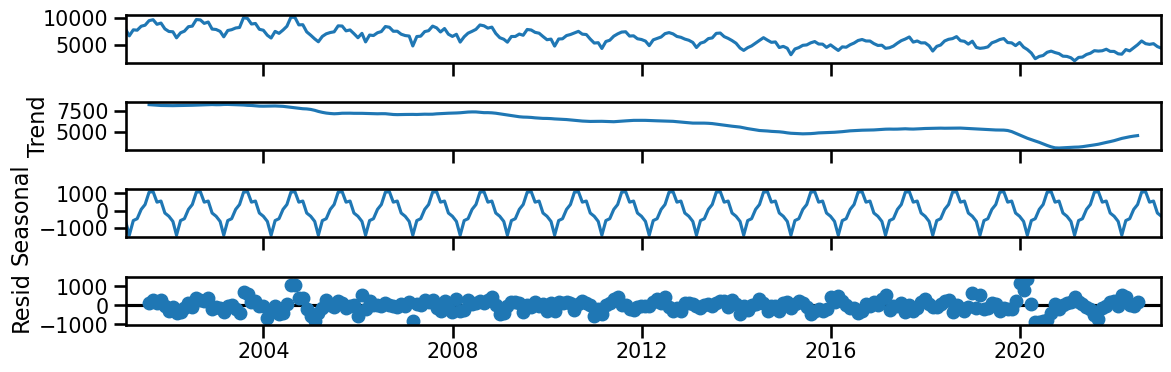

In [20]:
dtheft.plot()
dtheft.plot(seasonal=True);

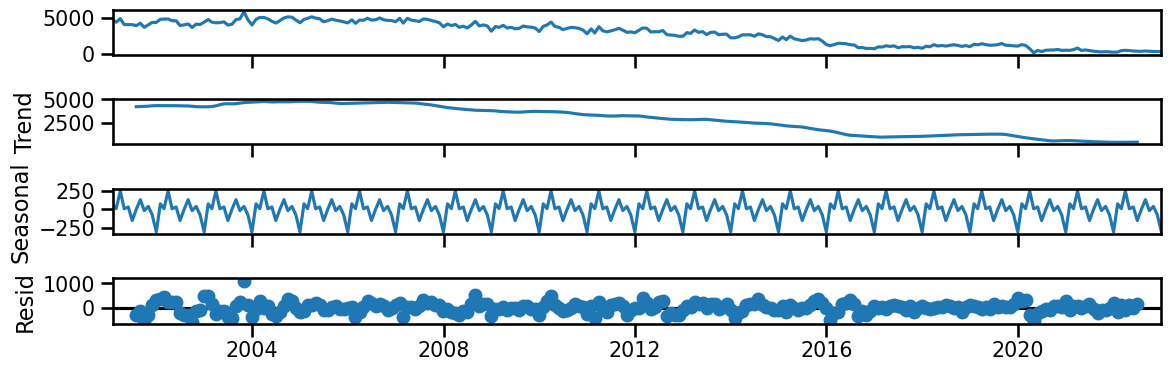

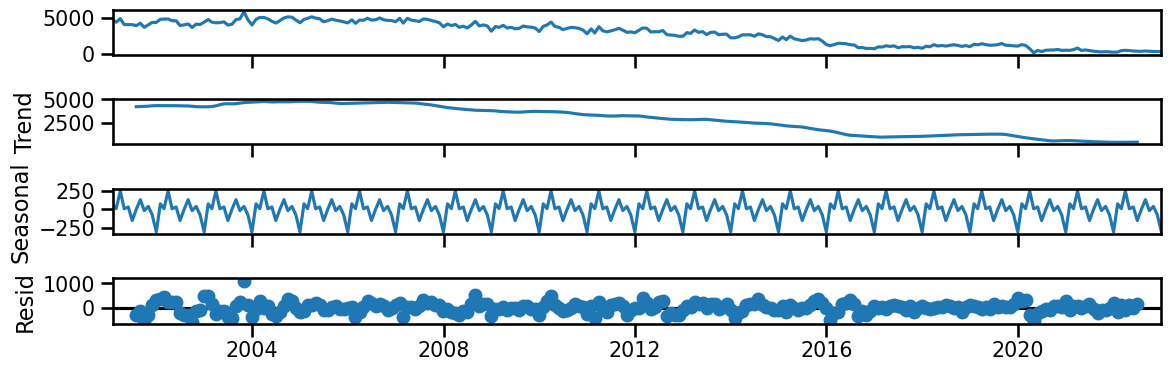

In [21]:
dnarcotics.plot()
dnarcotics.plot(seasonal=True);

## Trend

In [22]:
dtheft.trend

Date
2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
              ..
2022-08-31   NaN
2022-09-30   NaN
2022-10-31   NaN
2022-11-30   NaN
2022-12-31   NaN
Freq: M, Name: trend, Length: 264, dtype: float64

In [23]:
dnarcotics.trend

Date
2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
              ..
2022-08-31   NaN
2022-09-30   NaN
2022-10-31   NaN
2022-11-30   NaN
2022-12-31   NaN
Freq: M, Name: trend, Length: 264, dtype: float64

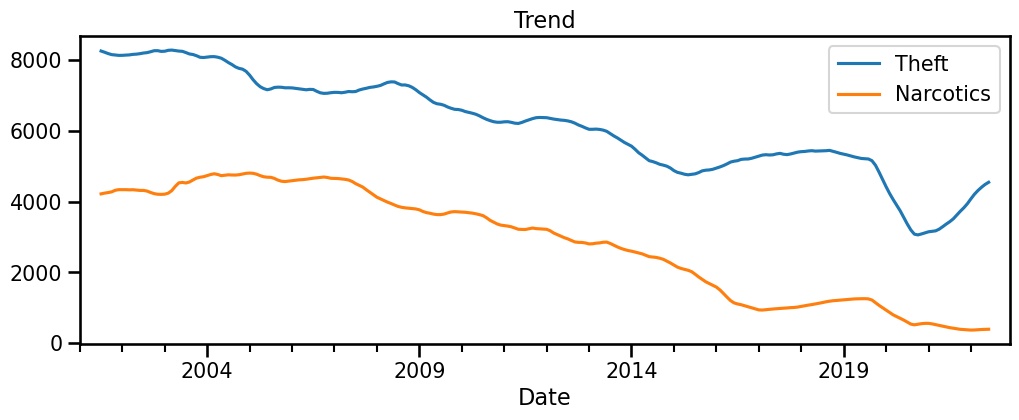

In [24]:
dtheft.trend.plot(title='Trend',label='Theft')
dnarcotics.trend.plot(label='Narcotics')
plt.legend();

## Seasonal

In [25]:
dtheft.seasonal.head()

Date
2001-01-31    -637.881779
2001-02-28   -1446.042493
2001-03-31    -587.838128
2001-04-30    -479.173446
2001-05-31      65.395999
Freq: M, Name: seasonal, dtype: float64

In [26]:
dnarcotics.seasonal.head()

Date
2001-01-31     74.689484
2001-02-28      9.499008
2001-03-31    247.929563
2001-04-30      8.379960
2001-05-31     32.407738
Freq: M, Name: seasonal, dtype: float64

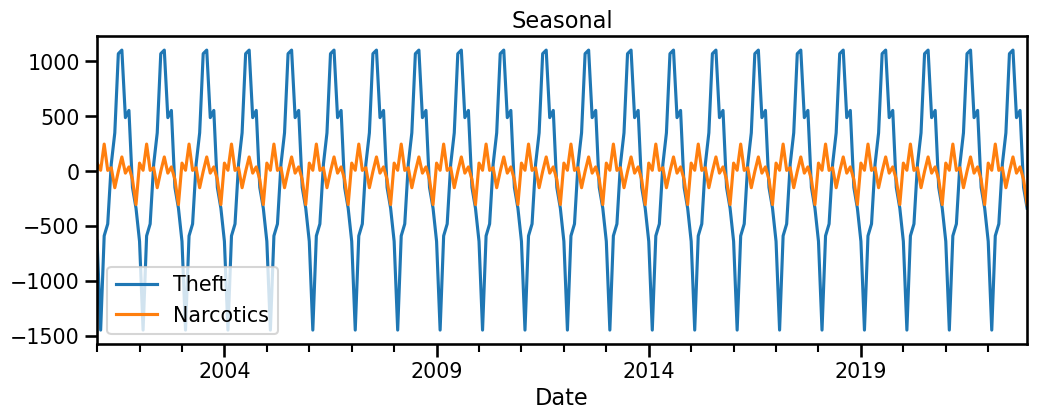

In [27]:
dtheft.seasonal.plot(title='Seasonal',label="Theft")
dnarcotics.seasonal.plot(label='Narcotics')
plt.legend();

## Residual

In [28]:
dtheft.resid.head()

Date
2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
Freq: M, Name: resid, dtype: float64

In [29]:
dnarcotics.resid.head()

Date
2001-01-31   NaN
2001-02-28   NaN
2001-03-31   NaN
2001-04-30   NaN
2001-05-31   NaN
Freq: M, Name: resid, dtype: float64

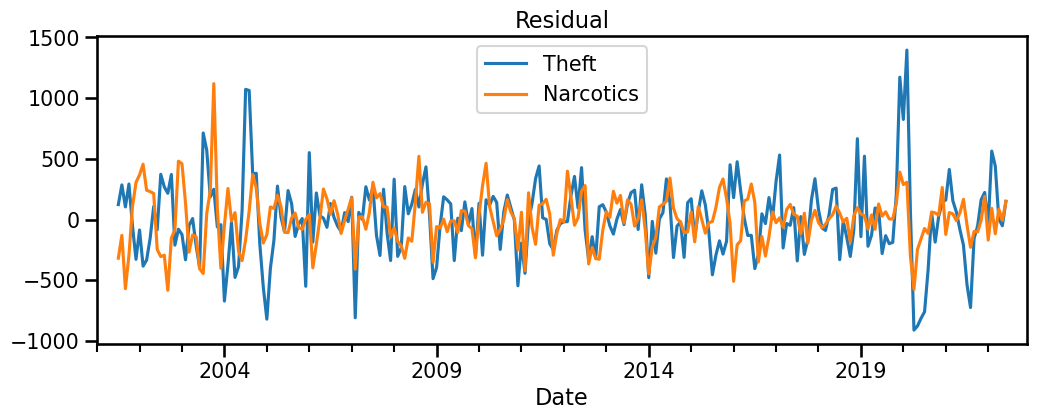

In [30]:
dtheft.resid.plot(title='Residual')
dnarcotics.resid.plot()
plt.legend(['Theft','Narcotics']);

## Recombined

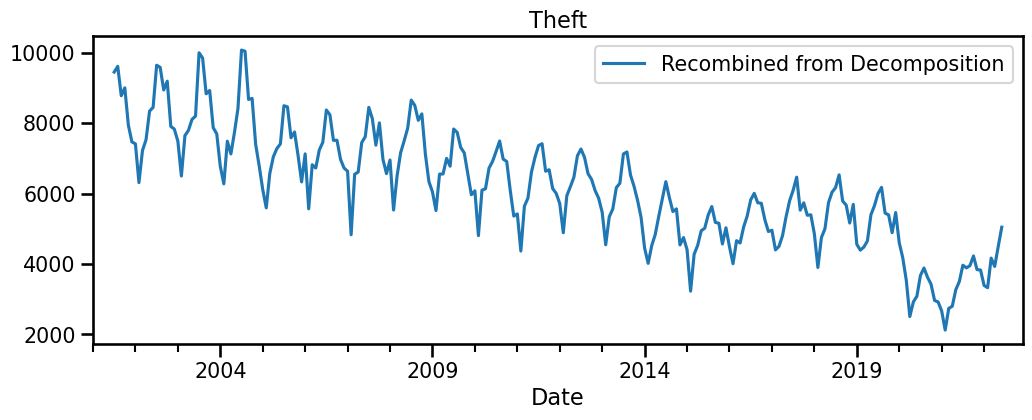

In [31]:
mtheft=dtheft.trend+dtheft.seasonal+dtheft.resid
ax=mtheft.plot(title='Theft')
ax.legend(['Recombined from Decomposition']);

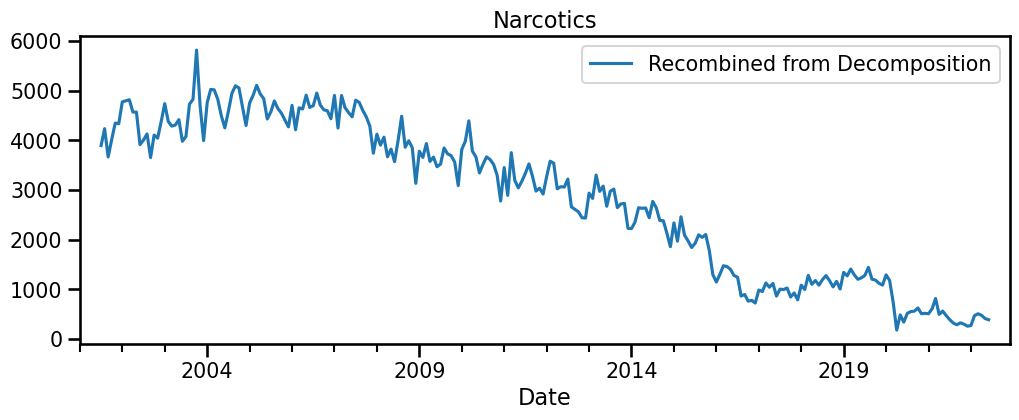

In [32]:
mnarcotics=dnarcotics.trend+dnarcotics.seasonal+dnarcotics.resid
ax=mnarcotics.plot(title='Narcotics')
ax.legend(['Recombined from Decomposition']);

### Additional Seasonal Graphs

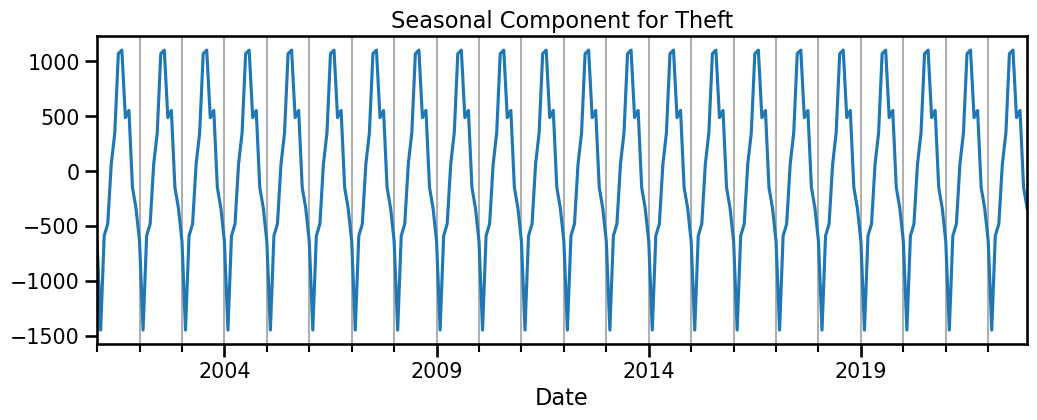

In [33]:
stheft=dtheft.seasonal
ax=stheft.plot(title=f'Seasonal Component for Theft')
ax.grid(which='both',axis='x');

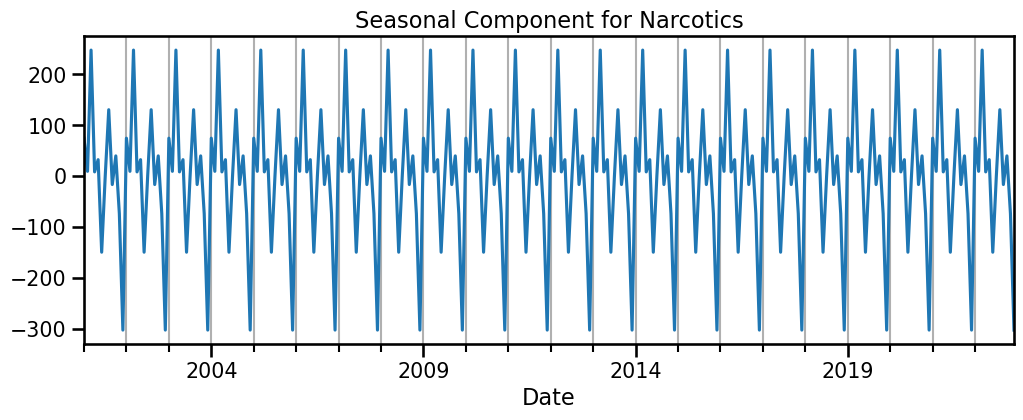

In [34]:
snarcotics=dnarcotics.seasonal
ax=snarcotics.plot(title=f'Seasonal Component for Narcotics')
ax.grid(which='both',axis='x');

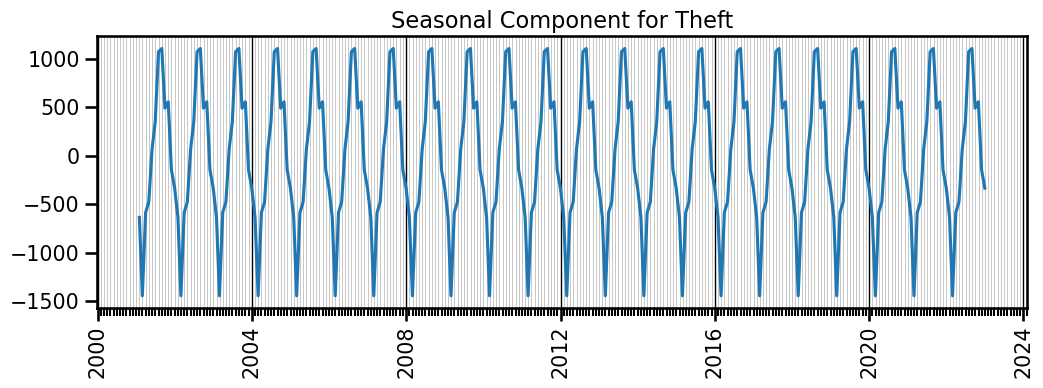

In [35]:
import matplotlib.dates as mdates
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(stheft)
ax.set(title=f'Seasonal Component for Theft');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')



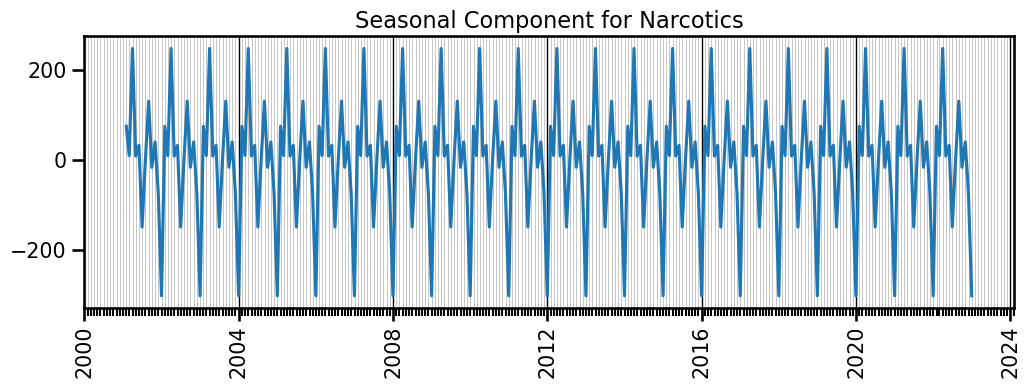

In [36]:

minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(snarcotics)
ax.set(title=f'Seasonal Component for Narcotics');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x',lw=1, color='k')
ax.grid(which='minor',axis='x',lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')



In [37]:
stheft.max()

1103.945601851852

In [38]:
stheft.min()

-1446.042493386243

In [39]:
snarcotics.max()

247.92956349206358

In [40]:
snarcotics.min()

-302.7331349206349

In [41]:
mag_theft=stheft.max()-stheft.min()
mag_theft

2549.988095238095

In [42]:
mag_nar=snarcotics.max()-snarcotics.min()
mag_nar

550.6626984126984

In [43]:
stheft.idxmax()

Timestamp('2001-08-31 00:00:00', freq='M')

In [44]:
stheft.idxmin()

Timestamp('2001-02-28 00:00:00', freq='M')

In [45]:
snarcotics.idxmax()

Timestamp('2001-03-31 00:00:00', freq='M')

In [46]:
snarcotics.idxmin()

Timestamp('2001-12-31 00:00:00', freq='M')

In [47]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')
    
    return fig, ax



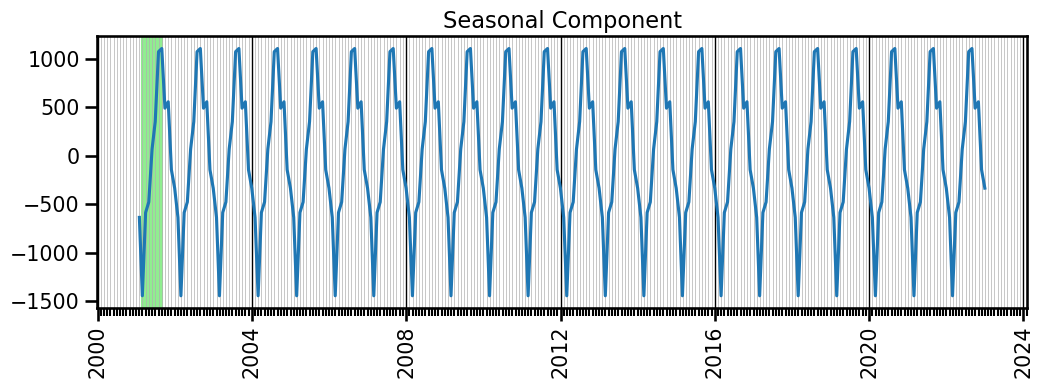

In [48]:
fig,ax=plot_seasonal(stheft)
ax.axvspan(stheft.idxmin(),stheft.idxmax(),color='lightgreen');

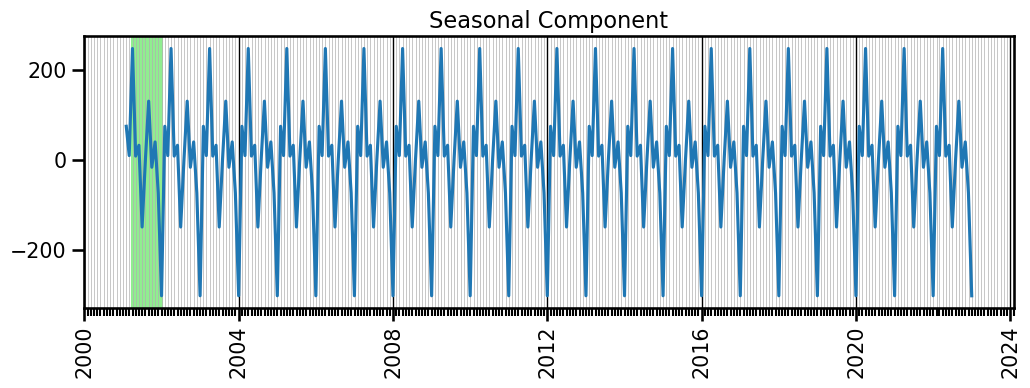

In [49]:
fig,ax=plot_seasonal(snarcotics)
ax.axvspan(snarcotics.idxmin(),snarcotics.idxmax(),color='lightgreen');

## Peaks and Props

In [50]:
det_theft=stheft.idxmax()-stheft.idxmin()
det_theft

Timedelta('184 days 00:00:00')

In [51]:
del_nar=snarcotics.idxmax()-snarcotics.idxmin()
del_nar

Timedelta('-275 days +00:00:00')

In [52]:
from scipy.signal import find_peaks
peaks, props = find_peaks(stheft, height=stheft.max())


In [53]:
peaks

array([  7,  19,  31,  43,  55,  67,  79,  91, 103, 115, 127, 139, 151,
       163, 175, 187, 199, 211, 223, 235, 247, 259])

In [54]:
props

{'peak_heights': array([1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185, 1103.94560185, 1103.94560185,
        1103.94560185, 1103.94560185])}

In [55]:
npeaks,nprops=find_peaks(snarcotics,height=snarcotics.max())

In [56]:
npeaks

array([  2,  14,  26,  38,  50,  62,  74,  86,  98, 110, 122, 134, 146,
       158, 170, 182, 194, 206, 218, 230, 242, 254])

In [57]:
nprops

{'peak_heights': array([247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349, 247.92956349, 247.92956349,
        247.92956349, 247.92956349])}

In [58]:
p_dates=stheft.index[peaks]
p_dates

DatetimeIndex(['2001-08-31', '2002-08-31', '2003-08-31', '2004-08-31',
               '2005-08-31', '2006-08-31', '2007-08-31', '2008-08-31',
               '2009-08-31', '2010-08-31', '2011-08-31', '2012-08-31',
               '2013-08-31', '2014-08-31', '2015-08-31', '2016-08-31',
               '2017-08-31', '2018-08-31', '2019-08-31', '2020-08-31',
               '2021-08-31', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [59]:
peak_dates=snarcotics.index[npeaks]
peak_dates

DatetimeIndex(['2001-03-31', '2002-03-31', '2003-03-31', '2004-03-31',
               '2005-03-31', '2006-03-31', '2007-03-31', '2008-03-31',
               '2009-03-31', '2010-03-31', '2011-03-31', '2012-03-31',
               '2013-03-31', '2014-03-31', '2015-03-31', '2016-03-31',
               '2017-03-31', '2018-03-31', '2019-03-31', '2020-03-31',
               '2021-03-31', '2022-03-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

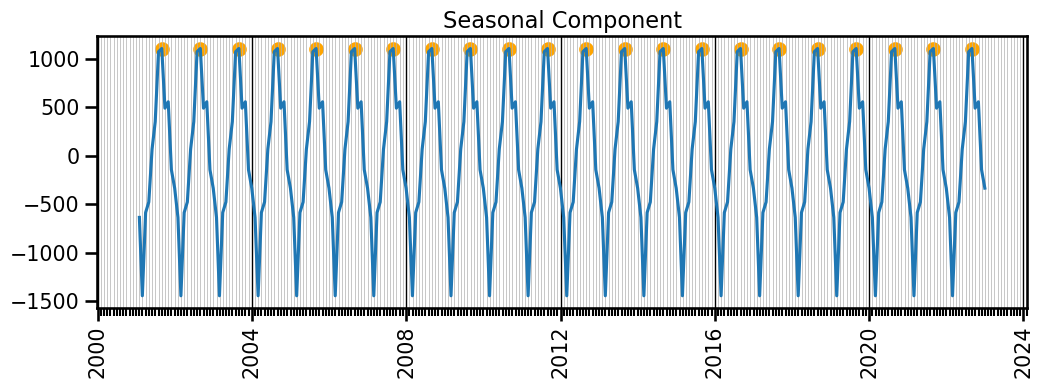

In [60]:
fig,ax=plot_seasonal(stheft)
ax.scatter(p_dates,props['peak_heights'], color='orange');

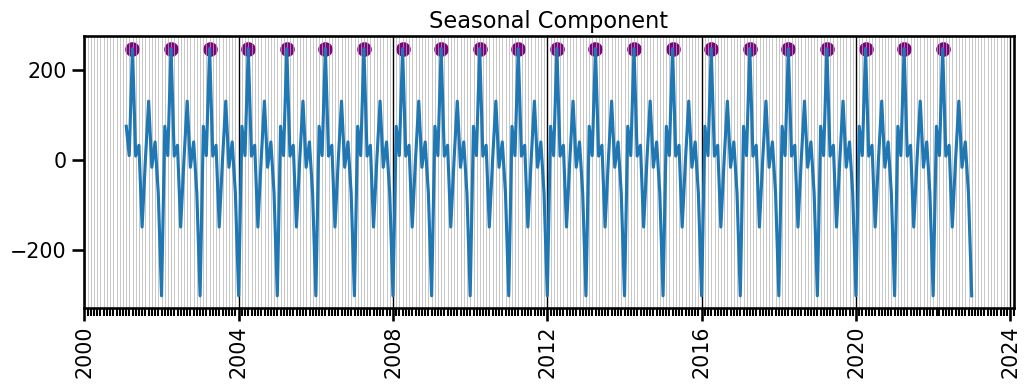

In [61]:
fig,ax=plot_seasonal(snarcotics)
ax.scatter(peak_dates,nprops["peak_heights"],color='purple');

### Highlight highest Year of theft and narcotics

In [62]:
tperiod=p_dates[1]-p_dates[0]
tperiod

Timedelta('365 days 00:00:00')

In [63]:
nperiod=peak_dates[1]-peak_dates[0]
nperiod

Timedelta('365 days 00:00:00')

In [64]:
tperiods = []
for i in range(len(p_dates)-1):
    delta = p_dates[i+1] - p_dates[i]
    tperiods.append(delta)
tperiods



[Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

In [65]:
nperiods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    nperiods.append(delta)
nperiods



[Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('366 days 00:00:00'),
 Timedelta('365 days 00:00:00'),
 Timedelta('365 days 00:00:00')]

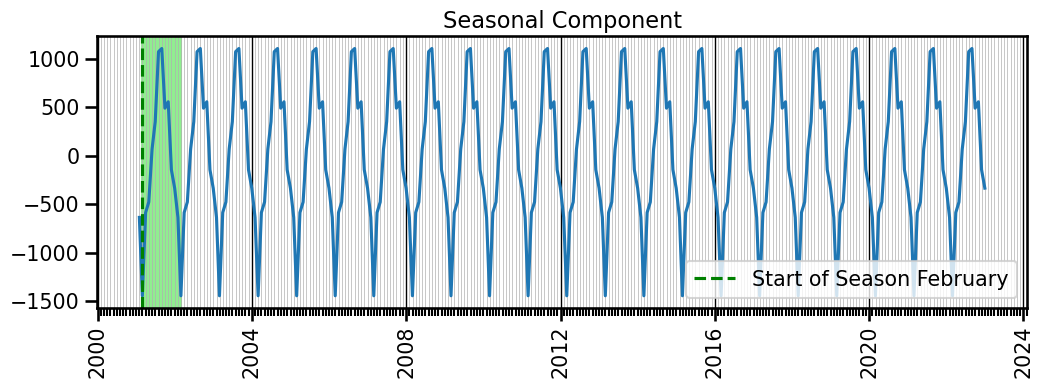

In [66]:
fig, ax = plot_seasonal(stheft)
season_start = stheft.idxmin()
ax.axvspan( season_start, season_start +tperiod, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();


In [67]:
stheft.max()-stheft.min()

2549.988095238095

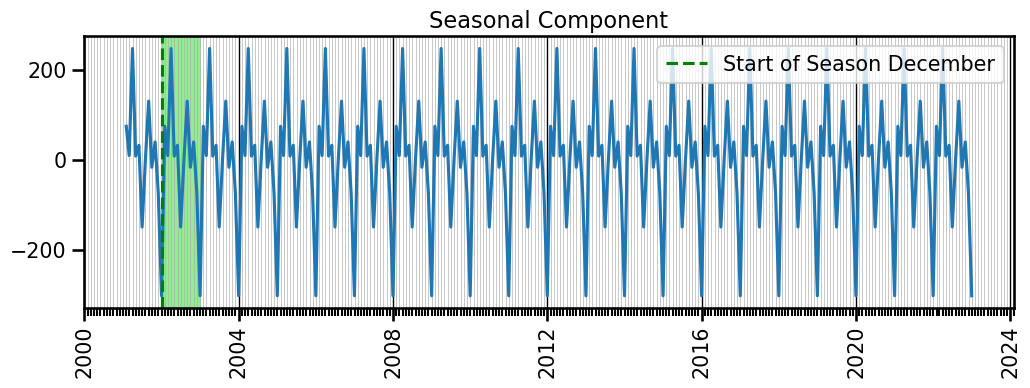

In [68]:
fig, ax = plot_seasonal(snarcotics)
season_start = snarcotics.idxmin()
ax.axvspan( season_start, season_start +nperiod, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();


In [69]:
snarcotics.max()-snarcotics.min()

550.6626984126984

# acf and pacf

In [70]:
from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split

In [71]:

### NEW FUNCTION FOR COMBINED ACF/PACF WITH ANNOTATIONS
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)
    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')
    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )
    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")
        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 
        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")
    fig.tight_layout()
    
    return fig



In [72]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])


In [73]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax



In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics



## Theft (Seasonal)

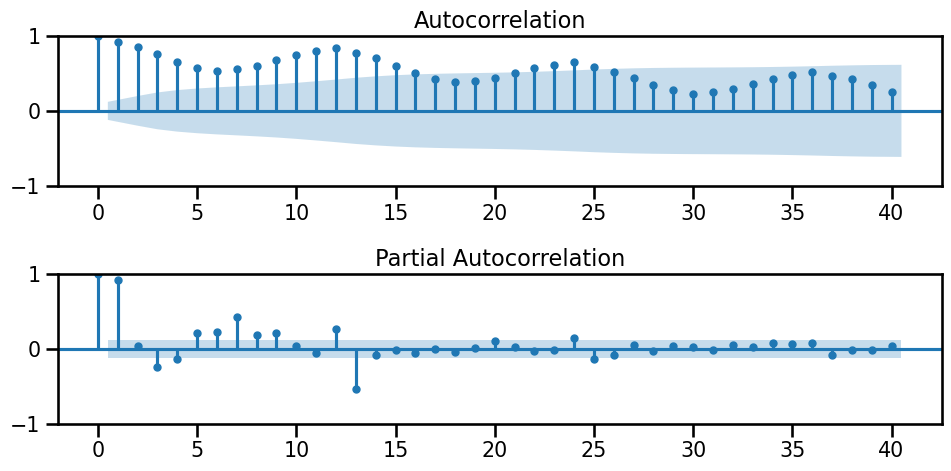

In [75]:
plot_acf_pacf(rtheft);

In [76]:
get_adfuller_results(rtheft)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.393935,13,250,0.58518,0.05,False


In [77]:
dt=nsdiffs(rtheft,m=12)
print(f'dt={dt}')

dt=0


In [78]:
t_diff=rtheft.dropna()
get_adfuller_results(t_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.393935,13,250,0.58518,0.05,False


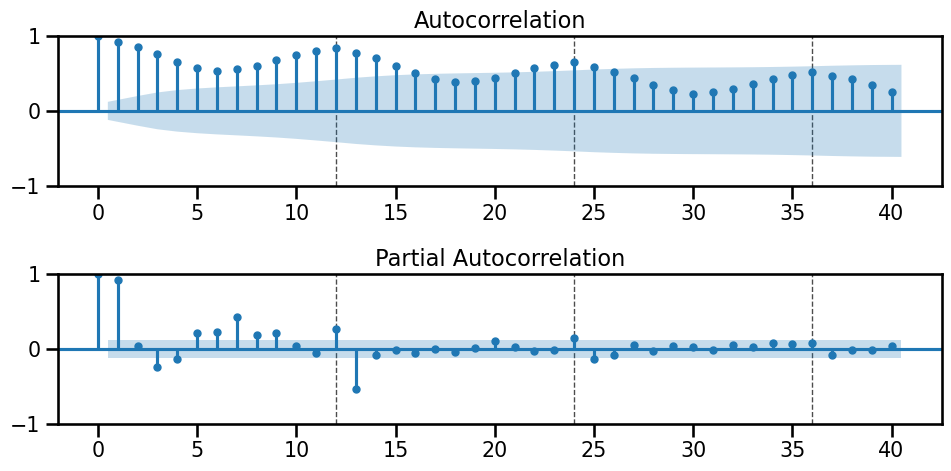

In [79]:
plot_acf_pacf(t_diff, annotate_seas=True,m=12);

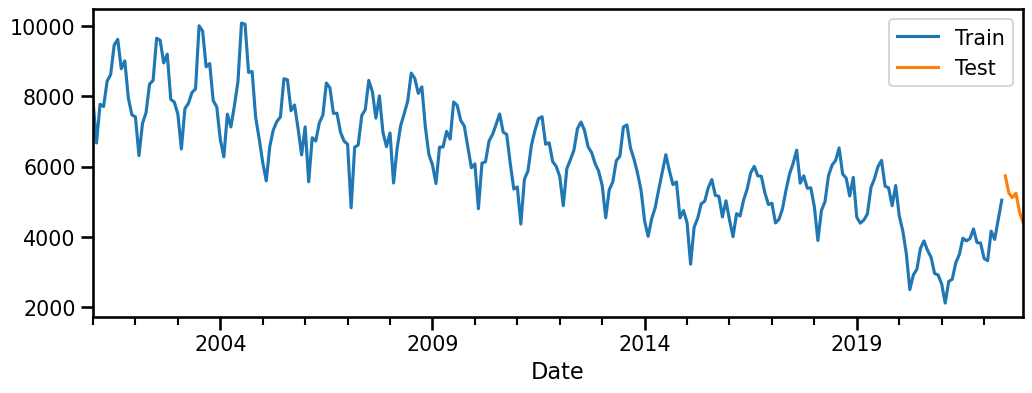

In [80]:
train, test =train_test_split(rtheft,test_size=6)
ax=train.plot(label="Train")
test.plot(ax=ax,label='Test')
ax.legend();

In [81]:
p=1
d=1
q=1
P=1
D=0
Q=1
m=12
sarima=tsa.ARIMA(train,order=(p,d,q),seasonal_order=(P,D,Q,m)).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 244.155
- MSE = 87,381.677
- RMSE = 295.604
- R^2 = 0.505
- MAPE = 4.97%


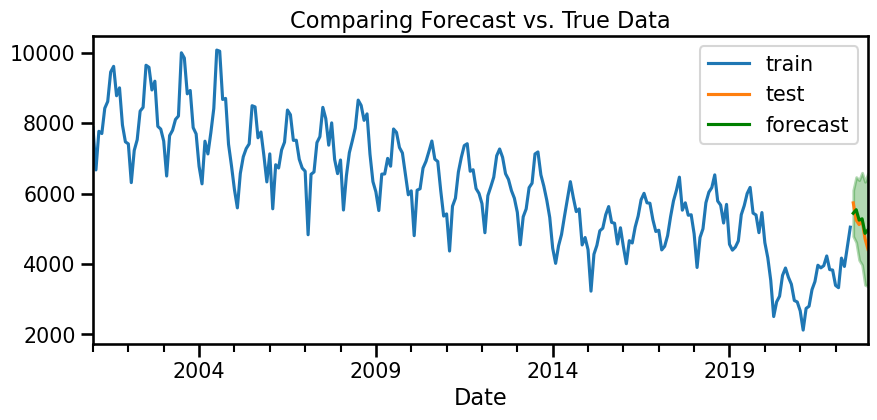

In [82]:
forecast_the=sarima.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_the)
regression_metrics_ts(test,forecast_the['mean'])

In [83]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1874.391
Date:                          Fri, 27 Oct 2023   AIC                           3758.782
Time:                                  08:09:49   BIC                           3776.528
Sample:                              01-31-2001   HQIC                          3765.919
                                   - 06-30-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      1.820      0.549      0.583      -2.567       4.565
ma.L1         -0.9989      1.840     -0.543      0.587      -4.604       2.606
ar.S.L12       0.9689      0.009    104.088      0.000       0.951       0.987
ma.S.L12      -0.6510      0.046    -14.298      0.000      -0.740      -0.562
sigma2      1.115e+05   7803.163     14.295      0.000    9.62e+04    1.27e+05
===================================================================================
Ljung-Box (L1) (Q):                  10.92   Jarque-Bera (JB):                12.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.25
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

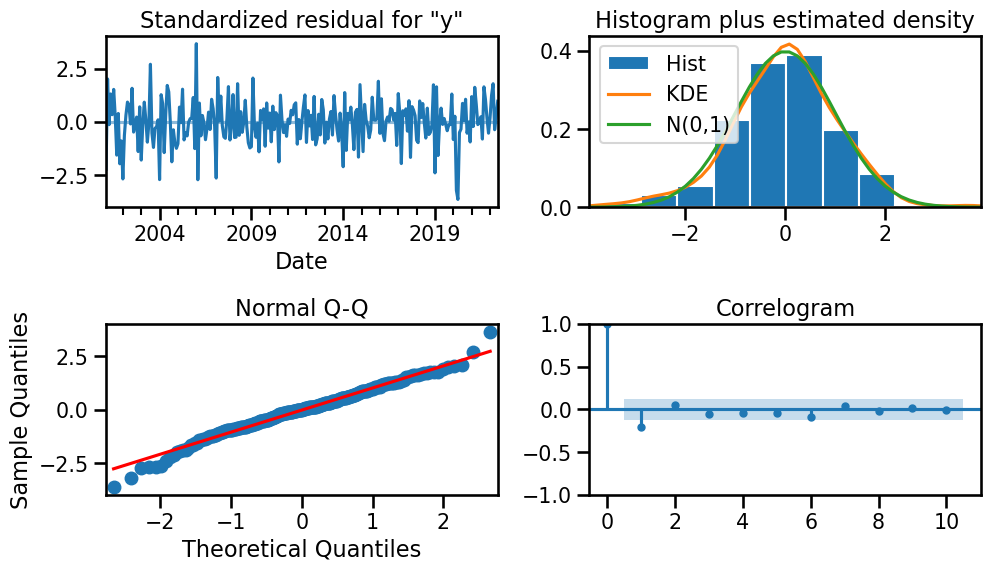

In [84]:
fig=sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [85]:
import pmdarima as pm

In [86]:
auto_the=pm.auto_arima(train,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4050.524, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3791.710, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3914.631, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4048.603, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4050.805, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3774.214, Time=0.31 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3744.013, Time=0.75 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3743.960, Time=0.25 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3913.736, Time=0.08 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3742.901, Time=0.67 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3870.719, Time=0.29 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3754.859, Time=0.54 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,0)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(

 ARIMA(1,1,0)(2,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,0,2)[12]             : AIC=3753.387, Time=0.29 sec
 ARIMA(2,1,0)(1,0,2)[12]             : AIC=3743.206, Time=0.86 sec
 ARIMA(1,1,1)(1,0,2)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,1)(1,0,2)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(2,1,1)(1,0,2)[12]             : AIC=inf, Time=0.90 sec

Best model:  ARIMA(1,1,0)(1,0,2)[12]          
Total fit time: 14.929 seconds


In [87]:
print(auto_the.order)
print(auto_the.seasonal_order)

(1, 1, 0)
(1, 0, 2, 12)


In [88]:
auto_the.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  258
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.634
Date:                                 Fri, 27 Oct 2023   AIC                           3741.268
Time:                                         08:10:04   BIC                           3759.013
Sample:                                     01-31-2001   HQIC                          3748.404
                                          - 06-30-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2251      0.046     -4.934      0.000      -0.315      -0.136
ar.S.L12       0.9778      0.008    120.054      0.000       0.962       0.994
ma.S.L12      -0.5771      0.059     -9.815      0.000      -0.692      -0.462
ma.S.L24      -0.1202      0.068     -1.758      0.079      -0.254       0.014
sigma2      1.038e+05   7353.346     14.120      0.000    8.94e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                30.54
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.44
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

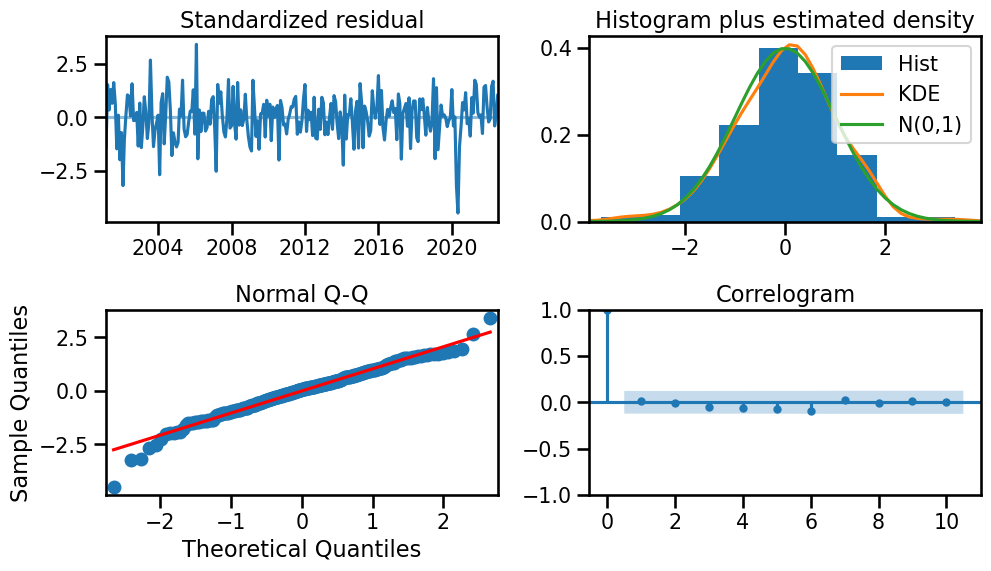

In [89]:
fig=auto_the.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 211.159
- MSE = 72,805.178
- RMSE = 269.824
- R^2 = 0.587
- MAPE = 4.27%


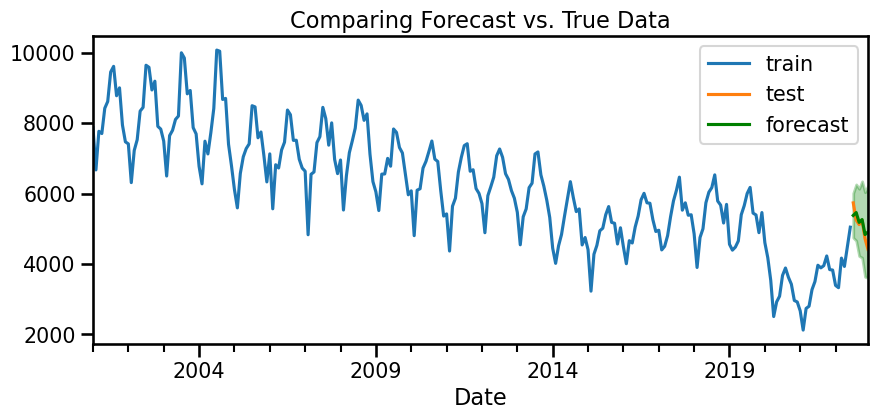

In [90]:
auto_the=tsa.ARIMA(train,order=auto_the.order,seasonal_order=auto_the.seasonal_order).fit()
forecast_the=auto_the.get_forecast(steps=len(test)).summary_frame()
plot_forecast(train,test,forecast_the);
regression_metrics_ts(test,forecast_the['mean'])

### auto_model was a better fit

## Narcotics

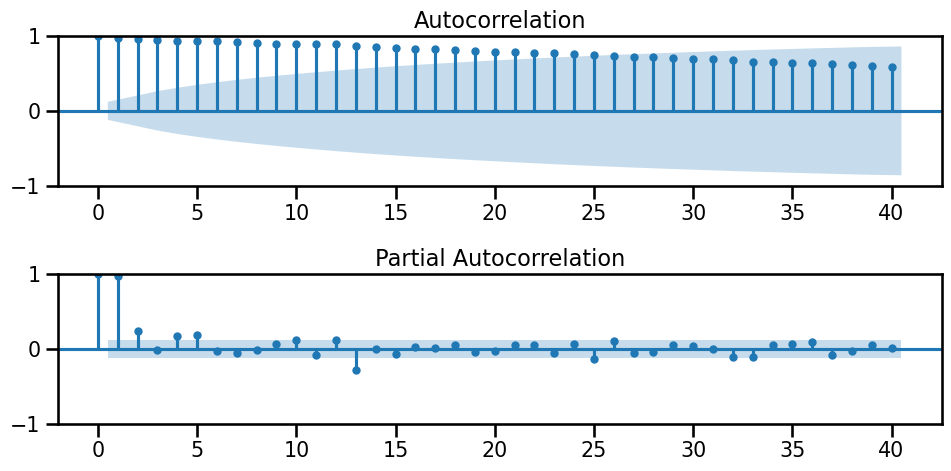

In [91]:
plot_acf_pacf(rnarcotics);

In [92]:
get_adfuller_results(rnarcotics)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.265472,12,251,0.975704,0.05,False


In [93]:
dn=ndiffs(rnarcotics)
print(f'dn={dn}')

dn=1


In [94]:
nar_diff=rnarcotics.diff().dropna()
get_adfuller_results(nar_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-5.393766,11,251,0.000003,0.05,True


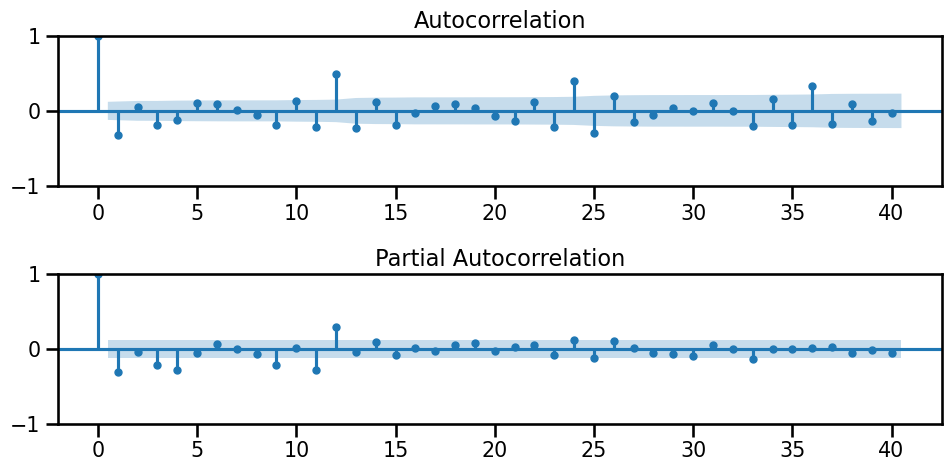

In [95]:
plot_acf_pacf(nar_diff);

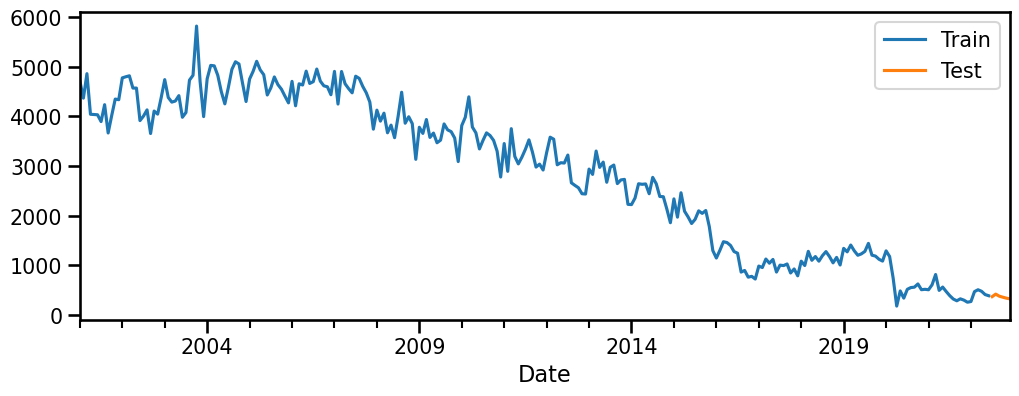

In [96]:
train,test=train_test_split(rnarcotics,test_size=6)
ax=train.plot(label='Train')
test.plot(label='Test')
ax.legend();

In [97]:
p=1
d=1
q=1
arima_nar=tsa.ARIMA(train,order=(p,d,q)).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 44.191
- MSE = 2,472.482
- RMSE = 49.724
- R^2 = -1.663
- MAPE = 12.67%


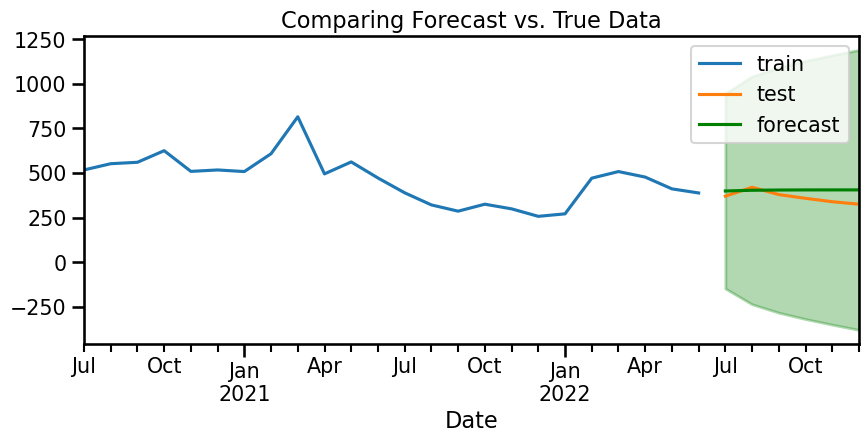

In [98]:
forecast_nar=arima_nar.get_forecast(len(test)).summary_frame()
plot_forecast(train.tail(24),test,forecast_nar)
regression_metrics_ts(test,forecast_nar['mean'])

In [99]:
arima_nar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  258
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1811.671
Date:                Fri, 27 Oct 2023   AIC                           3629.342
Time:                        08:10:06   BIC                           3639.989
Sample:                    01-31-2001   HQIC                          3633.623
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3570      0.093      3.851      0.000       0.175       0.539
ma.L1         -0.7523      0.070    -10.710      0.000      -0.890      -0.615
sigma2      7.786e+04   5643.319     13.798      0.000    6.68e+04    8.89e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                18.70
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

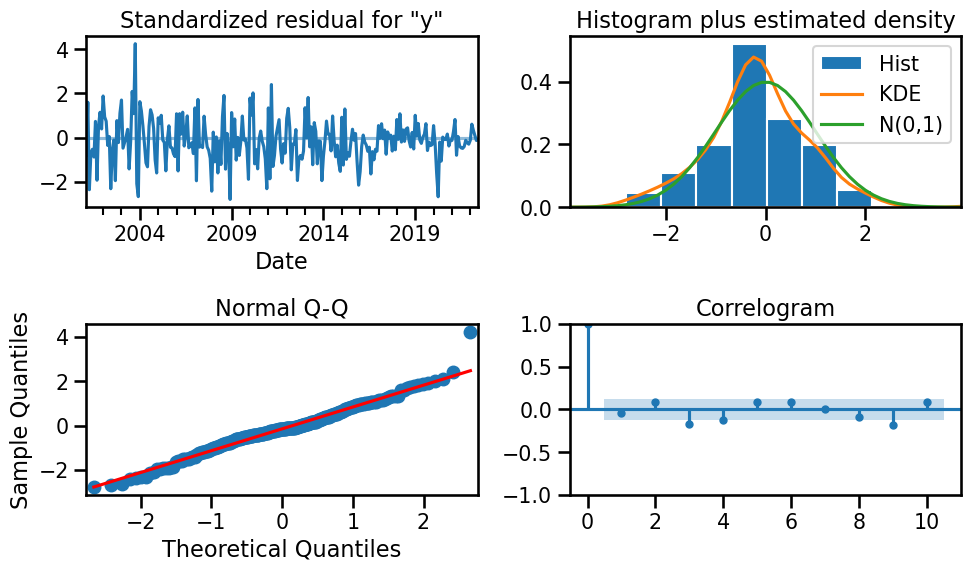

In [100]:
fig=arima_nar.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [101]:
nauto_model=pm.auto_arima(train,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3669.016, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3643.189, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3635.953, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3667.813, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3624.808, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3625.645, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3626.257, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3630.712, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3644.771, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3629.342, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.584 seconds


In [102]:
print(nauto_model.order)
print(nauto_model.seasonal_order)

(1, 1, 1)
(0, 0, 0, 0)


In [103]:
nauto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  258
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1808.404
Date:                Fri, 27 Oct 2023   AIC                           3624.808
Time:                        08:10:07   BIC                           3639.005
Sample:                    01-31-2001   HQIC                          3630.517
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.6425      3.793     -2.543      0.011     -17.076      -2.209
ar.L1          0.3881      0.082      4.713      0.000       0.227       0.549
ma.L1         -0.8062      0.057    -14.139      0.000      -0.918      -0.694
sigma2      7.582e+04   5377.754     14.099      0.000    6.53e+04    8.64e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                21.57
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

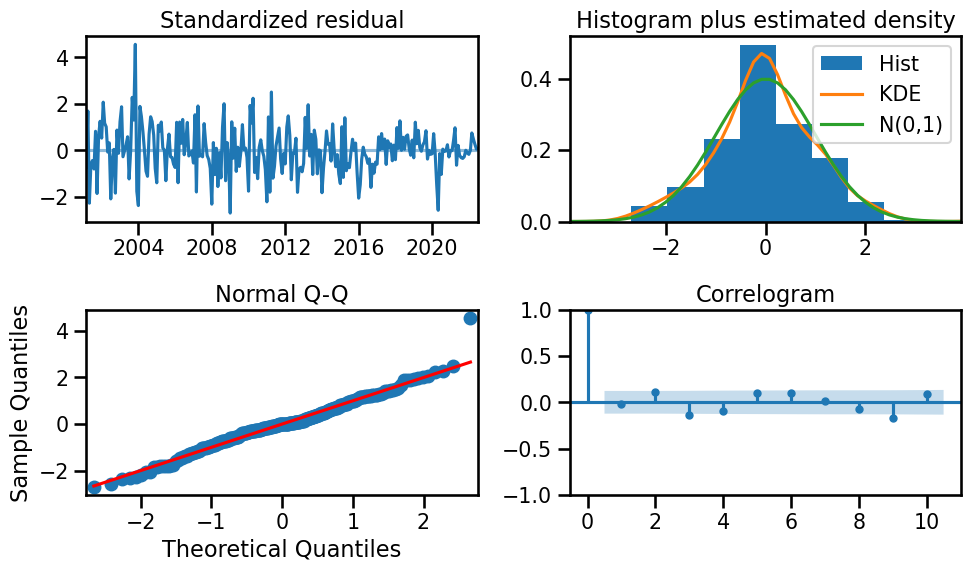

In [104]:
fig=nauto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [105]:
nauto_model=tsa.ARIMA(train,order=nauto_model.order,seasonal_order=nauto_model.seasonal_order).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 44.191
- MSE = 2,472.482
- RMSE = 49.724
- R^2 = -1.663
- MAPE = 12.67%


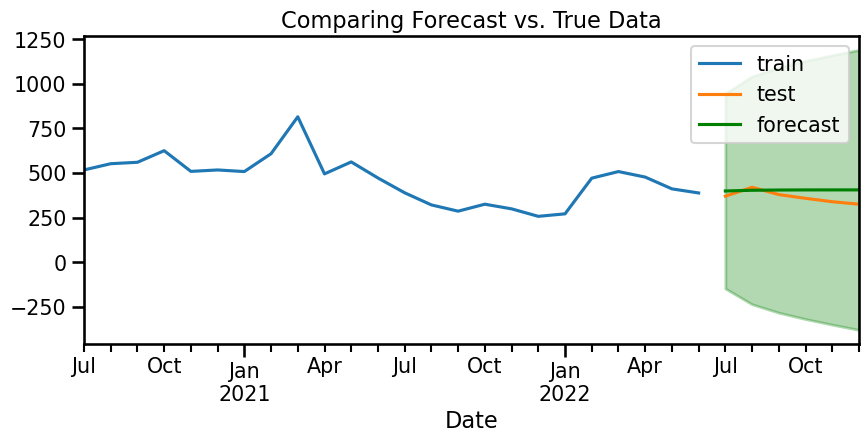

In [106]:
forecast_df=nauto_model.get_forecast(steps=len(test)).summary_frame()
plot_forecast(train.tail(24),test,forecast_df);
regression_metrics_ts(test,forecast_df['mean'])

### Same metrics (1,1,1)

## Theft future

In [110]:
p=1
d=1
q=0
P=1
D=0
Q=2
m=12
tfinal_mod=tsa.ARIMA(rtheft,order=(p,d,q), seasonal_order=(P,D,Q,m)).fit()

In [112]:
len(test)

6

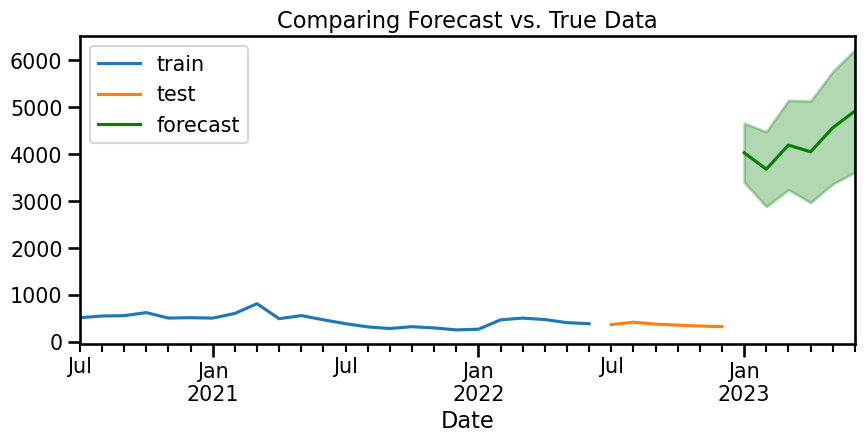

In [116]:
forecast_df  = tfinal_mod.get_forecast(len(test)).summary_frame()
plot_forecast(train.tail(24),test,forecast_df);

In [132]:
forecast_df.head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-01-31,4031.376191,321.600094,3401.051588,4661.700793
2023-02-28,3682.875398,406.865178,2885.434303,4480.316493
2023-03-31,4195.631981,485.835396,3243.412103,5147.851859
2023-04-30,4052.219537,551.905501,2970.504632,5133.934443
2023-05-31,4564.087789,611.225028,3366.108747,5762.066830


In [120]:
tstart=forecast_df['mean'].iloc[0]
tstart

4031.376190727666

In [121]:
tfinal=forecast_df['mean'].iloc[-1]
tfinal

4920.784852444844

In [122]:
tchange=tfinal-tstart
tchange

889.4086617171774

In [123]:
tperc=(tchange/tstart)*100
tperc

22.062159908639998

### 22.6%

## Narcotics future

In [117]:
p=1
d=1
q=1
nfinal_mod=tsa.ARIMA(rnarcotics,order=(p,d,q)).fit()

In [118]:
len(test)

6

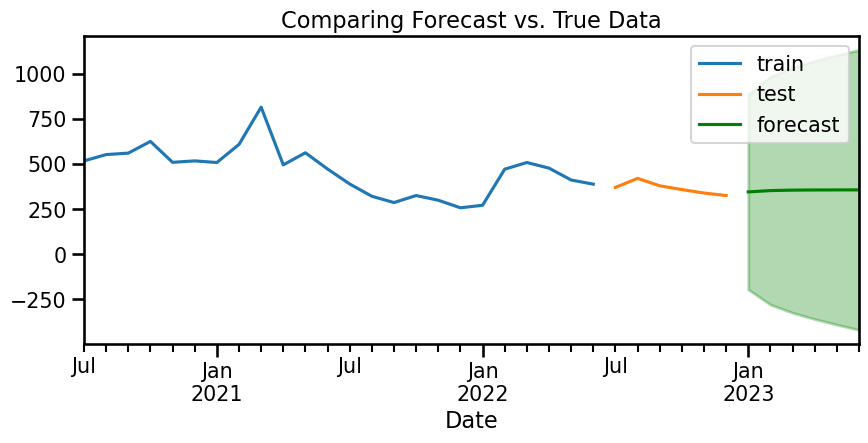

In [119]:
nforecast_df=nfinal_mod.get_forecast(len(test)).summary_frame()
plot_forecast(train.tail(24),test,nforecast_df);

In [131]:
nforecast_df.head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-01-31,345.179857,275.875073,-195.525350,885.885064
2023-02-28,352.385182,322.407147,-279.521214,984.291577
2023-03-31,354.957881,346.858498,-324.872283,1034.788044
2023-04-30,355.876477,365.119655,-359.744896,1071.497850
2023-05-31,356.204466,381.060065,-390.659537,1103.068469


In [124]:
nstart=nforecast_df['mean'].iloc[0]
nstart

345.17985695700577

In [126]:
nfinal=nforecast_df['mean'].iloc[-1]
nfinal

356.32157657366736

In [127]:
nchange=nstart-nfinal
nchange

-11.14171961666159

In [128]:
nperc=(nchange/nstart)*100
nperc

-3.227801214961787

### -3.23%


# Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?

## Theft

# Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?


## Theft

# Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?

## Theft